# Organization:

The assignment is divided into
1. Original Code: the starter code provided, where the model is wrapped in a function *create_model*
2. 5 Parts corresponding to each question asked

# Original Code

Import Libraries

In [1]:
# libraries (do not import additional libraries)
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import math
import matplotlib.pyplot as plt

Initial Paramters

In [2]:
# parameters for this script
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False


Data Pre-processing

In [3]:
# Load the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# partition training set into training and validation set
x_validate = x_train[40000:,:]
x_train = x_train[:40000,:]
y_validate = y_train[40000:,:]
y_train = y_train[:40000,:]


170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


The Original CNN 

In [4]:
# A convolutional neural network function

def create_model(dropOut=True, data_augmentation=False, optName="rmsopt", activation="relu", size=3, epochs=20):
  model = Sequential()
  model.add(Conv2D(32, (size, size), padding='same',input_shape=x_train.shape[1:]))
  model.add(Activation(activation))
  if size == 3:
    model.add(Conv2D(32, (size, size), padding='same'))
    model.add(Activation(activation))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  if dropOut:
    model.add(Dropout(0.25))

  model.add(Conv2D(64, (size, size), padding='same'))
  model.add(Activation(activation))
  if size == 3:
    model.add(Conv2D(64, (size, size), padding='same'))
    model.add(Activation(activation))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  if dropOut:
    model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation(activation))
  if dropOut:
    model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  # initiate RMSprop optimizer
  if optName == "rmsopt":
    opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
  elif optName == "adagrad":
    opt = keras.optimizers.Adagrad()
  else:
    opt = keras.optimizers.Adam()
  # Compile the model before using it
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
  print(model.summary())


  # create a callback that will save the best model while training
  if dropOut:
    appendix = "DO"
  else:
    appendix = "noDO"
  if data_augmentation:
    appendix2 = "DA"
  else:
    appendix2 = "noDA"
  name = 'best_model_'+str(size)+"_"+appendix+"_"+appendix2+"_"+optName+"_"+activation
  save_best_model = ModelCheckpoint(name, monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
  # train without data augmentation
  if not data_augmentation:
      print('Not using data augmentation.')
      history = model.fit(x_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_data=(x_validate, y_validate),
                          shuffle=True,
                          callbacks=[save_best_model])

  # train with data augmentation
  else:
      print('Using real-time data augmentation.')
      # This will do preprocessing and realtime data augmentation:
      datagen = ImageDataGenerator(
          featurewise_center=False,  # set input mean to 0 over the dataset
          samplewise_center=False,  # set each sample mean to 0
          featurewise_std_normalization=False,  # divide inputs by std of the dataset
          samplewise_std_normalization=False,  # divide each input by its std
          zca_whitening=False,  # apply ZCA whitening
          zca_epsilon=1e-06,  # epsilon for ZCA whitening
          rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
          # randomly shift images horizontally (fraction of total width)
          width_shift_range=0.1,
          # randomly shift images vertically (fraction of total height)
          height_shift_range=0.1,
          shear_range=0.,  # set range for random shear
          zoom_range=0.,  # set range for random zoom
          channel_shift_range=0.,  # set range for random channel shifts
          # set mode for filling points outside the input boundaries
          fill_mode='nearest',
          cval=0.,  # value used for fill_mode = "constant"
          horizontal_flip=True,  # randomly flip images
          vertical_flip=False,  # randomly flip images
          # set rescaling factor (applied before any other transformation)
          rescale=None,
          # set function that will be applied on each input
          preprocessing_function=None,
          # image data format, either "channels_first" or "channels_last"
          data_format=None,
          # fraction of images reserved for validation (strictly between 0 and 1)
          validation_split=0.0)

      # Compute quantities required for feature-wise normalization
      # (std, mean, and principal components if ZCA whitening is applied).
      datagen.fit(x_train)

      # Fit the model on the batches generated by datagen.flow().
      history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                          steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                          epochs=epochs,
                          validation_data=(x_validate, y_validate),
                          callbacks=[save_best_model])
  return history

# Part 1

In [ ]:
# original model
history = create_model()

# dense nn 0-4 layers
dense_nn=[]
for i in range(5):
  model = Sequential()
  model.add(Flatten())
  for j in range(i):
      model.add(Dense(512))
      model.add(Activation('relu'))
      model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  # initiate RMSprop optimizer
  opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

  # Compile the model before using it
  model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

  # create a callback that will save the best model while training
  best_model = ModelCheckpoint('best_model_'+str(i), monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

  history2 = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[best_model])
  dense_nn.append(history2)



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)       

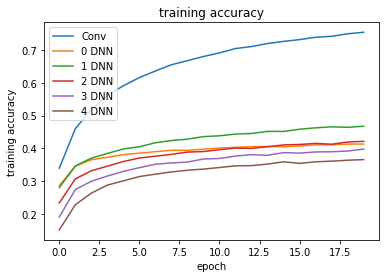

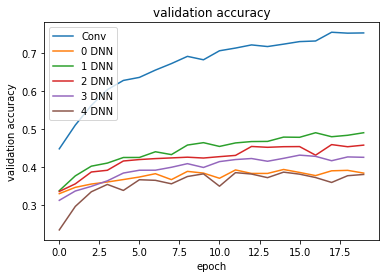

313/313 [==============================] - 1s 3ms/step - loss: 0.7444 - accuracy: 0.7482
CNN Test accuracy: 0.748199999332428
313/313 [==============================] - 1s 2ms/step - loss: 1.7481 - accuracy: 0.3940
0 Dense NN Test accuracy: 0.39399999380111694
313/313 [==============================] - 1s 2ms/step - loss: 1.4693 - accuracy: 0.4854
1 Dense NN Test accuracy: 0.48539999127388
313/313 [==============================] - 1s 2ms/step - loss: 1.5370 - accuracy: 0.4550
2 Dense NN Test accuracy: 0.45500001311302185
313/313 [==============================] - 1s 2ms/step - loss: 1.6564 - accuracy: 0.4309
3 Dense NN Test accuracy: 0.4309000074863434
313/313 [==============================] - 1s 2ms/step - loss: 1.8226 - accuracy: 0.3897
4 Dense NN Test accuracy: 0.3896999955177307


In [ ]:
legendName = ['Conv']
for i in range(5):
  legendName.append(str(i)+" DNN")    
# Plot training accuracy
plt.plot(history.history['accuracy'])
for i in dense_nn:
  plt.plot(i.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(legendName, loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history.history['val_accuracy'])
for i in dense_nn:
  plt.plot(i.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(legendName, loc='upper left')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model = load_model('best_model_3_DO_noDA_rmsopt_relu')
scores = saved_model.evaluate(x_test, y_test, verbose=1)
print('CNN Test accuracy:', scores[1])

for i in range(5):
  scores = load_model('best_model_'+str(i)).evaluate(x_test, y_test, verbose=1)
  print(str(i)+' Dense NN Test accuracy:', scores[1])

### Explanation:

In the graph, one can see that CNN has the best accuracy for both training and the validation set and outperforms any of the dense neural networks. This is because when using dense neural network, information in the 2d dimension is lost and flattened into 1d, while the CNN uses convolutions and max pooling to capture information in 2d. 

For Dense neural network, ignoring the 0 hidden layer for now, the accuracy is ranked descendingly with 1 hidden layer, 2 hidden layers, 3 hidden layers, and 4 hidden layers. So with more hidden layers, the accuracy decreases. This could be due to needing more epochs and data to optimize more complex models. It may also be due to the fact that we are using drop out rate of 0.5, which makes training more as the number of layers increase.

The neural network with 0 hidden layer performed worse than DNNs with 1 or 2 hidden layers, this could mean the data is not linearly separable.

# Part 2

In [ ]:
history_sigmoid = create_model(activation="sigmoid")

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_31 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_32 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)      

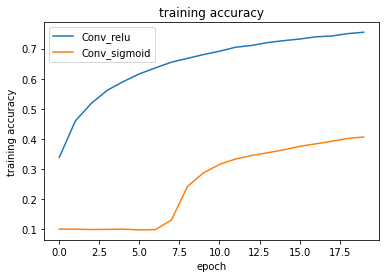

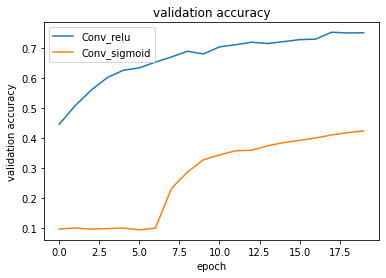

313/313 [==============================] - 1s 3ms/step - loss: 0.7444 - accuracy: 0.7482
CNN with relu Test accuracy: 0.748199999332428
313/313 [==============================] - 1s 3ms/step - loss: 1.5795 - accuracy: 0.4374
CNN with sigmoid Test accuracy: 0.4374000132083893


In [ ]:
  
# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history_sigmoid.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Conv_relu', 'Conv_sigmoid'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history.history['val_accuracy'])
plt.plot(history_sigmoid.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['Conv_relu', 'Conv_sigmoid'], loc='upper left')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model = load_model('best_model_3_DO_noDA_rmsopt_relu')
scores = saved_model.evaluate(x_test, y_test, verbose=1)
print('CNN with relu Test accuracy:', scores[1])
scores = load_model('best_model_3_DO_noDA_rmsopt_sigmoid').evaluate(x_test, y_test, verbose=1)
print('CNN with sigmoid Test accuracy:', scores[1])

### Explanation

The CNN with sigmoid units has lower accuracy than rectified linear units. This is because sigmoid units suffer from the vanishing gradient problem, so each step of gradient descent will make only very small change to the weights, leading to slow convergence shown in the graph. Rectified linear units are more computationally efficient, and reduces the likelihood of vanishing gradient, and converges more quickly shown in the graph.

# Part 3

In [ ]:
noDO_DA = create_model(dropOut=False, data_augmentation=True, epochs= 100)
noDO_noDA = create_model(dropOut=False, data_augmentation=False, epochs=100)
DO_DA = create_model(dropOut=True, data_augmentation=True, epochs=100)
DO_noDA = create_model(dropOut=True, data_augmentation=False, epochs=100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0

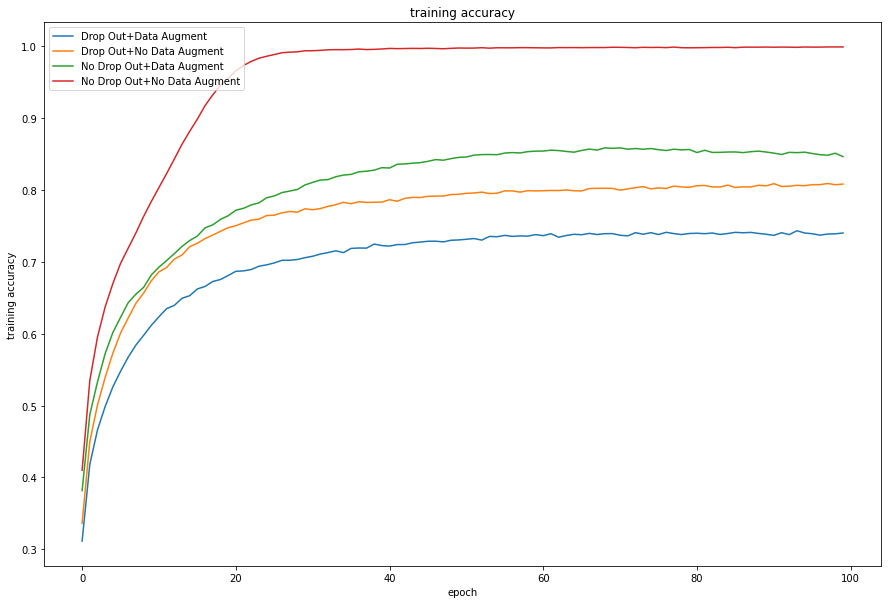

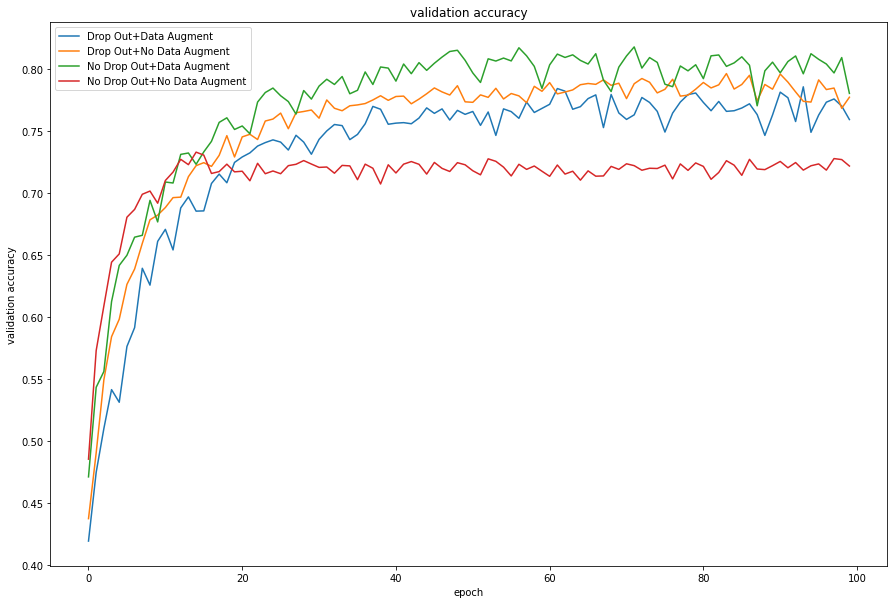

313/313 [==============================] - 1s 3ms/step - loss: 0.6693 - accuracy: 0.7808
CNN with Drop Out and with Data Augmentation Test accuracy: 0.7807999849319458
313/313 [==============================] - 1s 3ms/step - loss: 0.6404 - accuracy: 0.8120
CNN without Drop Out and with Data Augmentation Test accuracy: 0.8119999766349792
313/313 [==============================] - 1s 3ms/step - loss: 0.6794 - accuracy: 0.7842
CNN with Drop Out and without Data Augmentation Test accuracy: 0.7842000126838684
313/313 [==============================] - 1s 3ms/step - loss: 0.8963 - accuracy: 0.7242
CNN without Drop Out and without Data Augmentation Test accuracy: 0.7242000102996826


In [ ]:
# Plot training accuracy
plt.figure(figsize=(15,10))
plt.plot(DO_DA.history['accuracy'])
plt.plot(DO_noDA.history['accuracy'])
plt.plot(noDO_DA.history['accuracy'])
plt.plot(noDO_noDA.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Drop Out+Data Augment','Drop Out+No Data Augment','No Drop Out+Data Augment', 'No Drop Out+No Data Augment'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.figure(figsize=(15,10))
plt.plot(DO_DA.history['val_accuracy'])
plt.plot(DO_noDA.history['val_accuracy'])
plt.plot(noDO_DA.history['val_accuracy'])
plt.plot(noDO_noDA.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['Drop Out+Data Augment','Drop Out+No Data Augment','No Drop Out+Data Augment', 'No Drop Out+No Data Augment'], loc='upper left')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set

scores = load_model('best_model_3_DO_DA_rmsopt_relu').evaluate(x_test, y_test, verbose=1)
print('CNN with Drop Out and with Data Augmentation Test accuracy:', scores[1])

scores = load_model('best_model_3_noDO_DA_rmsopt_relu').evaluate(x_test, y_test, verbose=1)
print('CNN without Drop Out and with Data Augmentation Test accuracy:', scores[1])

scores = load_model('best_model_3_DO_noDA_rmsopt_relu').evaluate(x_test, y_test, verbose=1)
print('CNN with Drop Out and without Data Augmentation Test accuracy:', scores[1])

scores = load_model('best_model_3_noDO_noDA_rmsopt_relu').evaluate(x_test, y_test, verbose=1)
print('CNN without Drop Out and without Data Augmentation Test accuracy:', scores[1])

### Explanation

In training, one sees that without dropout and without data augment the accuracy is the highest. However, in the validation and test set, this combination has the least accuracy in the long run, due to overfitting. 

In training,using only data augmentation leads to the second highest accuracy, and in the validation and test set, this also has the highest accuracy in the long run. This shows that using data augmentation helps generalize the model well and trains the neural network well.

Using only drop out also leads to a good accuracy as shown in the validation graph and test accuracy, as it is a good way to approximate ensemble learning where during each training iteration, a different subnetwork is trained. 

Next is data augmentation and drop out combination. Since both methods are dealing with overfitting, using both could overly generalize the model, underfit the data and lead to a lesser accuracy.

# Part 4

In [5]:
# initiate RMSprop optimizer
history_rmsopt = create_model(optName="rmsopt", epochs=100)
history_adagrad = create_model(optName="adagrad", epochs=100)
history_adam = create_model(optName="adam", epochs=100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

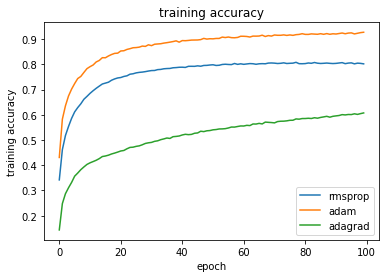

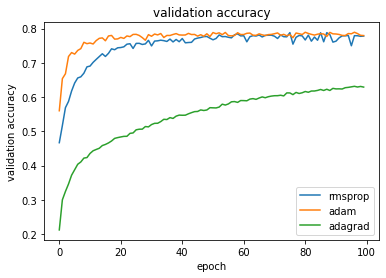

313/313 [==============================] - 1s 3ms/step - loss: 0.7029 - accuracy: 0.7806
RMSopt Test accuracy: 0.7806000113487244
313/313 [==============================] - 1s 3ms/step - loss: 0.9797 - accuracy: 0.7690
Adam Test accuracy: 0.7689999938011169
313/313 [==============================] - 1s 3ms/step - loss: 1.0769 - accuracy: 0.6251
Adagrad Test accuracy: 0.6251000165939331


In [6]:
plt.plot(history_rmsopt.history['accuracy'])
plt.plot(history_adam.history['accuracy'])
plt.plot(history_adagrad.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(["rmsprop", "adam", "adagrad"], loc='lower right')
plt.show()

# Plot validation accuracy
plt.plot(history_rmsopt.history['val_accuracy'])
plt.plot(history_adam.history['val_accuracy'])
plt.plot(history_adagrad.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(["rmsprop", "adam", "adagrad"], loc='lower right')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set

scores = load_model('best_model_3_DO_noDA_rmsopt_relu').evaluate(x_test, y_test, verbose=1)
print('RMSProp Test accuracy:', scores[1])
scores = load_model('best_model_3_DO_noDA_adam_relu').evaluate(x_test, y_test, verbose=1)
print('Adam Test accuracy:', scores[1])
scores = load_model('best_model_3_DO_noDA_adagrad_relu').evaluate(x_test, y_test, verbose=1)
print('Adagrad Test accuracy:', scores[1])

### Explanation

Adagrad has the worst accuracy, this could be due to the fact that learning rates decay too quickly. 

RmsProp has better accuracy than Adagrad but less accuracy than Adam. This could be due to the fact that RmsProp improves upon the AdaGrad with weighted gradients and reduces its aggressive, monotonically decreasing learning rate. However RmsProp also lacks momentum, which is why it's not as good as Adam.

Adam uses the gradient's moving average and takes a step in that direction. This creates more momentum and allows Adam to perform better than both RmsProp and Adagrad

# Part 5

In [ ]:
history3x3 = create_model(size=3, epochs=100)
history5x5 = create_model(size=5, epochs=100)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_70 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_71 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 16, 16, 64)      

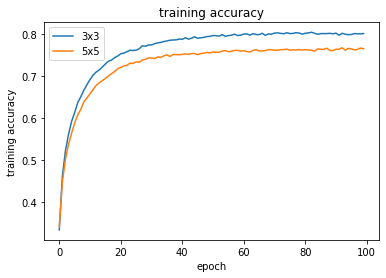

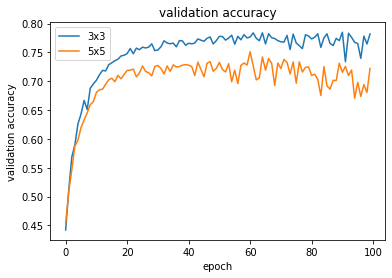

313/313 [==============================] - 1s 3ms/step - loss: 0.6929 - accuracy: 0.7818
CNN with 3X3 Test accuracy: 0.7817999720573425
313/313 [==============================] - 1s 3ms/step - loss: 0.8558 - accuracy: 0.7369
CNN with 5X5 Test accuracy: 0.7368999719619751


In [ ]:
# Plot training accuracy
plt.plot(history3x3.history['accuracy'])
plt.plot(history5x5.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['3x3', '5x5'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history3x3.history['val_accuracy'])
plt.plot(history5x5.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['3x3', '5x5'], loc='upper left')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model = load_model('best_model_3_DO_noDA_rmsopt_relu')
scores = saved_model.evaluate(x_test, y_test, verbose=1)
print('CNN with 3X3 Test accuracy:', scores[1])
scores = load_model('best_model_5_DO_noDA_rmsopt_relu').evaluate(x_test, y_test, verbose=1)
print('CNN with 5X5 Test accuracy:', scores[1])

### Explanation

The graph shows that the 3x3 filters with more layers better accuracy than 5x5 filters with less layers in both training and validation. 

The 3x3 filters have more layers, which makes the network deeper. In general, deeper networks are more expressive and gives better accuracy as they are able to learn from hierarchical features.  At the same time, the graph results could mean that the smaller and more local features could differentiate the images better.

In lecture 15, we learned that stacks of small filters is often preferred to a single large filter. This is because smaller filters have fewer parameters which makes it more computationally efficient. The 3x3 has 18 parameters to train while the 5x5 filter has 25 parameters to train, so the 3x3 filters is also more computationally efficient.